# **Table of Contents**
* [Data Wrangling](#section_8)<br><br>
* [Discovering Clusters](#section_2)
    * [Finding best 'K'](#section_3)
    * [Using best 'K'](#section_4)
    * [Cluster labelling](#section_5)
    * [Viewing Clusters](#section_6)<br><br>
* [Inference from Clusters](#section_7)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv ( "datasets/snails.csv", header=None , 
                  names =  ['Gender','Length','Diameter','Height','Weight','MeatWeight','GutWeight','ShellWeight','Rings']  )

df.sample(3)

,Gender,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
414,F,0.605,0.495,0.17,1.2385,0.5280,0.2465,0.390,14
2856,F,0.655,0.515,0.17,1.5270,0.8485,0.2635,0.331,11
3147,F,0.645,0.500,0.18,1.2785,0.5345,0.2995,0.345,13


<a id='section_8'></a>
# **1 - Data Wrangling**

## **1.1 - Drop**

In [3]:
df.drop ( 'Gender' , axis=1 , inplace =True )                    

## **1.2 - Transform**

In [4]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

In [5]:
df = pd.DataFrame ( pt.fit_transform(df)  ,  columns = df.columns )

df.head(3)

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,1.482358
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,-0.949135
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,-0.176075


## **1.3 - Feature Selection via PCA**

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca   =   PCA ()                        

pca.fit (df)
    
print  ( pca.explained_variance_ratio_ )

[8.82734608e-01 7.39636324e-02 1.97613005e-02 8.23378586e-03
 6.98759008e-03 5.65801254e-03 2.02450001e-03 6.36571030e-04]


In [8]:
pca  =  PCA ( n_components = 2 )                                  #  95 % explained variance

df   =  pca.fit_transform (df)

df   =  pd.DataFrame (df)

<a id='section_2'></a>
# **2 - Discovering Clusters** 

<a id='section_3'></a>
## **2.1 - Finding Best K**

### **2.1.1 - Pairplot**

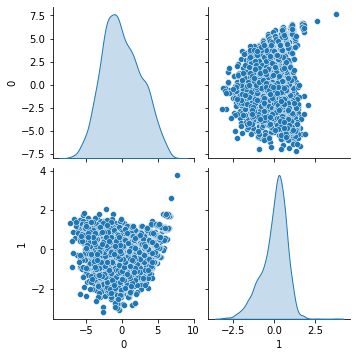

In [9]:
sns.pairplot ( df , diag_kind ='kde' ) ;

#### **Inference**
* Range of K = 2 to 6

### **2.1.2 - Elbow Plot**

In [11]:
from sklearn.cluster import KMeans

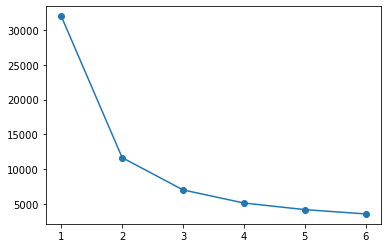

In [12]:
err    = []                      # wcss (within cluster sum square)     # inertia       # total spread

for k in range(1,7):
    
    KM  =  KMeans ( k , n_init =5 , max_iter =1000 , random_state =2 )
    KM.fit(df)            
    err.append    ( KM.inertia_  ) 
    
    
plt.plot  ( range(1,7)  , err  , marker='o') ;

### **2.1.3 - Silhouette Score**

In [13]:
from   sklearn.metrics   import  silhouette_score

In [14]:
scores =[]

for k in range(2,7):                                                               

    KM     =  KMeans (n_clusters =k , random_state =2)
    
    labels =  KM.fit_predict (df)

    avg    =  silhouette_score ( df , labels )
    
    scores.append ( {'k':k , 'Avg Silhouette Score':avg} )

In [15]:
table = pd.DataFrame (scores)

table.sort_values ( 'Avg Silhouette Score' , ascending=0 )  .head()    .style.hide_index()

k,Avg Silhouette Score
2,0.527005
3,0.445813
4,0.401573
6,0.386987
5,0.372780


### **2.1.4 - Dendrogram**

In [16]:
from sklearn.cluster          import  AgglomerativeClustering 
from scipy.cluster.hierarchy  import  dendrogram, linkage

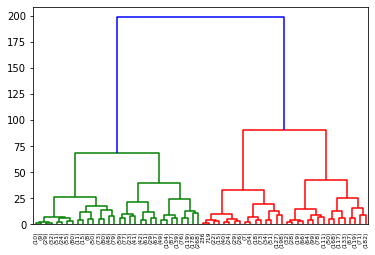

In [17]:
model  =  AgglomerativeClustering  (affinity ='euclidean' ,  linkage ='ward')

model.fit (df)

Z = linkage (df , 'ward')

dendrogram ( Z  ,  p=5  ,  truncate_mode='level')                                                  

plt.show()

<a id='section_4'></a>
## **2.2 - Using best K**

| Method | Best K |
| ---    | ---    |
| Elbow  | 2 |         
| Silhouette | 2 |
| Dendrogram | 3 |

In [18]:
KM    =  KMeans ( n_clusters=3 )  .fit (df)     

<a id='section_5'></a>
## **2.3 - Cluster labelling of records**

In [19]:
labels      =  KM.predict (df)                                        

df["cluster"] =  labels

<a id='section_6'></a>
## **2.4 - Viewing Clusters**

### **2.4.1 - Pairplot**

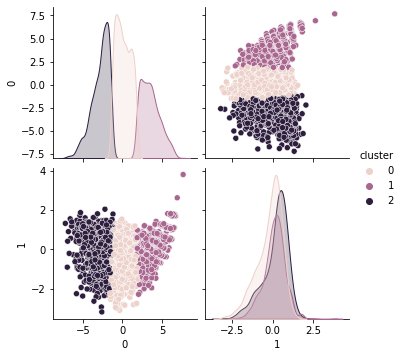

In [20]:
sns.pairplot ( df , diag_kind ='kde' , hue='cluster' ) ;

### **2.4.2 - Boxplot**

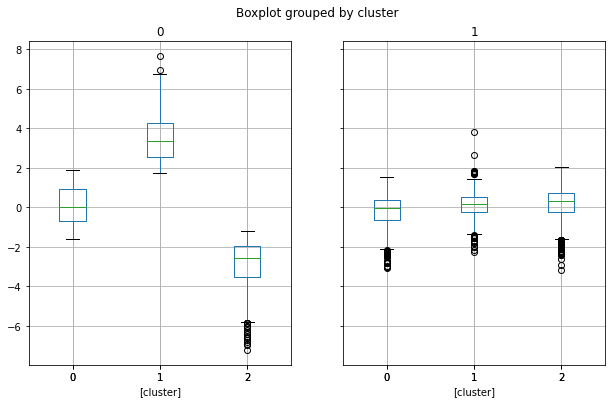

In [22]:
df.boxplot (by='cluster', figsize=(10,6))

plt.show()

### **2.4.3 Scatterplot**

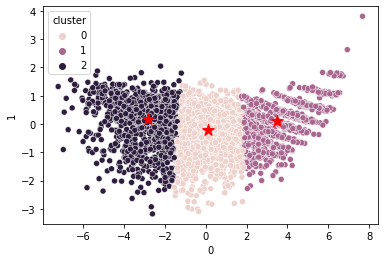

In [23]:
sns.scatterplot ( x= df[0] ,  y = df[1]  ,  hue = 'cluster' , data=df )  

plt.scatter ( x = KM.cluster_centers_[:, 0] , y = KM.cluster_centers_[:, 1] , s=150 , c='red' , marker='*' )

plt.show()

<a id='section_7'></a>
# **3 - Inference from Clusters**

| Label | Signifies |
| ---    | ---    |
| 0  | medium |         
| 1 | big |
| 2 | small |